## THIRD ML EXPERIMENT
#### WITH CPU AND SKLEARN

TARGET created with **SUCCESS SCORE 1** > 1000

This SUCCESS SCORE uses INFLUENCER SCORE as the following:

> $$ Influencer = \left(RI\over {friends + fans} \right) $$

For more information see notebook _Feature Engineering 3.ipynb_

**We exclude CANADA from the training**

**XGB BOOST AS BEST PERFOMANT MODEL**

**USING RANDOMIZED SEARCH FOR HYPERPARAMETER TUNING**

Best parameters found:  {'subsample': 0.3, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.9, 'colsample_bytree_vals': 1}

Best accuracy found:  0.420332021221975

In [44]:
import pandas as pd
from functools import reduce

In [ ]:
!pip install plotly

In [45]:
business = pd.read_csv('./data/business.csv')
attributes = pd.read_csv('./data/atributtes_clean.csv', low_memory=False)
categories = pd.read_csv('./data/categories_fixed.csv')
hours = pd.read_csv('./data/hours_fixed.csv')
gps = pd.read_csv('./data/gps_clustering.csv')
checkins = pd.read_csv('./data/n_checkins.csv')
top_tips = pd.read_csv('./data/top_tips.csv')
target1 = pd.read_csv('./data/target.csv')
target2 = pd.read_csv('./data/target2.csv')
sentiment = pd.read_csv('./data/sentiment/sentiment_ok_unique.csv')

In [46]:
target1

,Unnamed: 0,business_id,review_count,avg(reactions),avg(stars),avg(Influencer),success_score,target
0,0,OJpwmYvsZnXt62sxco3F0Q,399,2.576642,3.822384,0.576839,2266.813432,1
1,1,oZAdXhal_EZHePbjxo6s9g,15,2.866667,3.666667,0.217222,34.248704,0
2,2,bvkZndsHPy0nwpn3_iKCQQ,99,1.519608,3.558824,0.856587,458.611143,1
3,3,DmkUXt42gLCFsQh_MVsAqw,60,1.661290,3.467742,0.728788,251.909527,1
4,4,wGNNCB-EjhTby2BD2iqJCw,18,1.555556,2.888889,0.668744,54.093995,0
...,...,...,...,...,...,...,...,...
150341,150341,JjmdZrEmnYpmZnaV9bS78Q,5,1.400000,1.800000,0.000000,0.000000,0
150342,150342,0ojQ89edG3QXKYeIwmhaoA,5,1.800000,2.400000,0.467621,10.100619,0
150343,150343,D9XnYyiJn5nVGrSdhkrWRw,5,0.200000,5.000000,0.057867,0.289333,0
150344,150344,Z3gKM8swf0Nn0jlby1M_mg,6,2.166667,1.500000,0.632752,12.338663,0


In [47]:
target1['target'] = 0
target1.loc[target1['success_score'] > 1000,'target'] = 1

In [48]:
data_frames = [business, attributes, categories, hours, gps, checkins, top_tips, target1]
full_data_2 = reduce(lambda left,right: pd.merge(left,right,on='business_id', how='left'), data_frames)

In [49]:
full_data_2.shape

(150346, 55)

In [50]:
full_data_2.columns

Index(['business_id', 'name', 'postal_code', 'latitude_x', 'longitude_x',
       'stars', 'review_count_x', 'is_open', 'good_ambience', 'garage',
       'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'BikeParking',
       'WiFi', 'delivery', 'GoodForKids', 'OutdoorSeating',
       'RestaurantsReservations', 'HasTV', 'RestaurantsGoodForGroups',
       'Alcohol', 'ByAppointmentOnly', 'Caters', 'RestaurantsAttire',
       'NoiseLevel', 'meal_diversity', 'Restaurants', 'Food', 'Shopping',
       'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical',
       'Local Services', 'Bars', 'Automotive', 'total_categories', '7days',
       'weekends', 'n_open_days', 'mean_total_hours_open', 'mean_open_hour',
       'mean_close_hour', 'latitude_y', 'longitude_y', 'areas',
       'number_visits', 'number_tips', 'Unnamed: 0', 'review_count_y',
       'avg(reactions)', 'avg(stars)', 'avg(Influencer)', 'success_score',
       'target'],
      dtype='object')

In [51]:
to_drop = ['review_count_x','name', 'postal_code', 'latitude_x', 'longitude_x', 'stars', 'is_open', 'latitude_y', 'longitude_y',  'number_visits', 'number_tips', 'Unnamed: 0', '7days', 'n_open_days', 'total_categories', 'mean_open_hour', 'mean_close_hour' ,'number_visits', 'number_tips', 'Unnamed: 0', 'review_count_y',
       'avg(reactions)', 'avg(stars)', 'avg(Influencer)', 'success_score']
full_data_2.drop(to_drop, inplace=True, axis=1)

In [52]:
full_data_2 = full_data_2.loc[full_data_2['areas'] != 7, :]

In [54]:
full_data_2.index = full_data_2['business_id']
full_data_2.drop('business_id', axis=1, inplace=True)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.utils import class_weight

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#from functions import run_exps

import warnings
warnings.filterwarnings('ignore') 

In [56]:
full_data_2.isna().sum()

good_ambience                     0
garage                            0
BusinessAcceptsCreditCards        0
RestaurantsPriceRange2            0
BikeParking                       0
WiFi                              0
delivery                          0
GoodForKids                       0
OutdoorSeating                    0
RestaurantsReservations           0
HasTV                             0
RestaurantsGoodForGroups          0
Alcohol                           0
ByAppointmentOnly                 0
Caters                            0
RestaurantsAttire                 0
NoiseLevel                        0
meal_diversity                    0
Restaurants                     100
Food                            100
Shopping                        100
Home Services                   100
Beauty & Spas                   100
Nightlife                       100
Health & Medical                100
Local Services                  100
Bars                            100
Automotive                  

In [57]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

full_data_2['mean_total_hours_open'] = mice_imputer.fit_transform(full_data_2['mean_total_hours_open'].values.reshape(-1,1))

In [58]:
full_data_2.fillna(0, inplace=True)

In [59]:
full_data_3 = full_data_2.copy()

In [60]:
ohe = OneHotEncoder(sparse=False)
to_transform = ['areas', 'RestaurantsPriceRange2']
X = ohe.fit_transform(full_data_2[to_transform])
X = pd.DataFrame(X, columns=ohe.get_feature_names_out(to_transform), index=full_data_2.index)
full_data_2 = pd.concat([full_data_2, X], axis=1)
full_data_2.drop(to_transform, axis=1, inplace=True)

In [61]:
full_data_2.shape

(145875, 45)

In [62]:
full_data_2.isna().sum().sum()

0

In [63]:
full_data_2.columns

Index(['good_ambience', 'garage', 'BusinessAcceptsCreditCards', 'BikeParking',
       'WiFi', 'delivery', 'GoodForKids', 'OutdoorSeating',
       'RestaurantsReservations', 'HasTV', 'RestaurantsGoodForGroups',
       'Alcohol', 'ByAppointmentOnly', 'Caters', 'RestaurantsAttire',
       'NoiseLevel', 'meal_diversity', 'Restaurants', 'Food', 'Shopping',
       'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical',
       'Local Services', 'Bars', 'Automotive', 'weekends',
       'mean_total_hours_open', 'target', 'areas_0', 'areas_1', 'areas_2',
       'areas_3', 'areas_4', 'areas_5', 'areas_6', 'areas_8', 'areas_9',
       'areas_10', 'RestaurantsPriceRange2_0', 'RestaurantsPriceRange2_1',
       'RestaurantsPriceRange2_2', 'RestaurantsPriceRange2_3',
       'RestaurantsPriceRange2_4'],
      dtype='object')

In [64]:
import wandb
wandb.init(project="henry-tf-g2-ml1")

accuracy,0.87805


In [65]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
        '''
        Lightweight script to test many models and find winners
        :param X_train: training split
        :param y_train: training target vector
        :param X_test: test split
        :param y_test: test target vector
        :return: DataFrame of predictions
        '''
        
        dfs = []

        #dt = DecisionTreeClassifier(max_depth=1)

        models = [
                ('LogReg', LogisticRegression()), 
                ('RF', RandomForestClassifier()),
                ('KNN', KNeighborsClassifier()),
                ('GNB', GaussianNB()),
                ('XGB', XGBClassifier()),
                ('ADA', AdaBoostClassifier())
                ]
        results = []
        names = []

        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

        target_names = ['business_fail','business_success']

        for name, model in models:
                kfold = KFold(n_splits=5, shuffle=True, random_state=90210)
                cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
                clf = model.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                print(name)
                print(classification_report(y_test, y_pred))#, target_names=target_names))
                results.append(cv_results)
                names.append(name)
                this_df = pd.DataFrame(cv_results)
                this_df['model'] = name
                dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
        return final

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    full_data_2.drop('target', axis=1), full_data_2['target'], test_size=0.2,
    random_state=42, stratify=full_data_2['target'])

In [67]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27920
           1       0.54      0.07      0.13      1255

    accuracy                           0.96     29175
   macro avg       0.75      0.53      0.55     29175
weighted avg       0.94      0.96      0.94     29175

RF
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27920
           1       0.42      0.13      0.20      1255

    accuracy                           0.95     29175
   macro avg       0.69      0.56      0.59     29175
weighted avg       0.94      0.95      0.94     29175

KNN
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27920
           1       0.42      0.13      0.20      1255

    accuracy                           0.95     29175
   macro avg       0.69      0.56      0.59     29175
weighted avg       0.94      0.95      0.94     29175

GNB
 

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics


## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')


## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

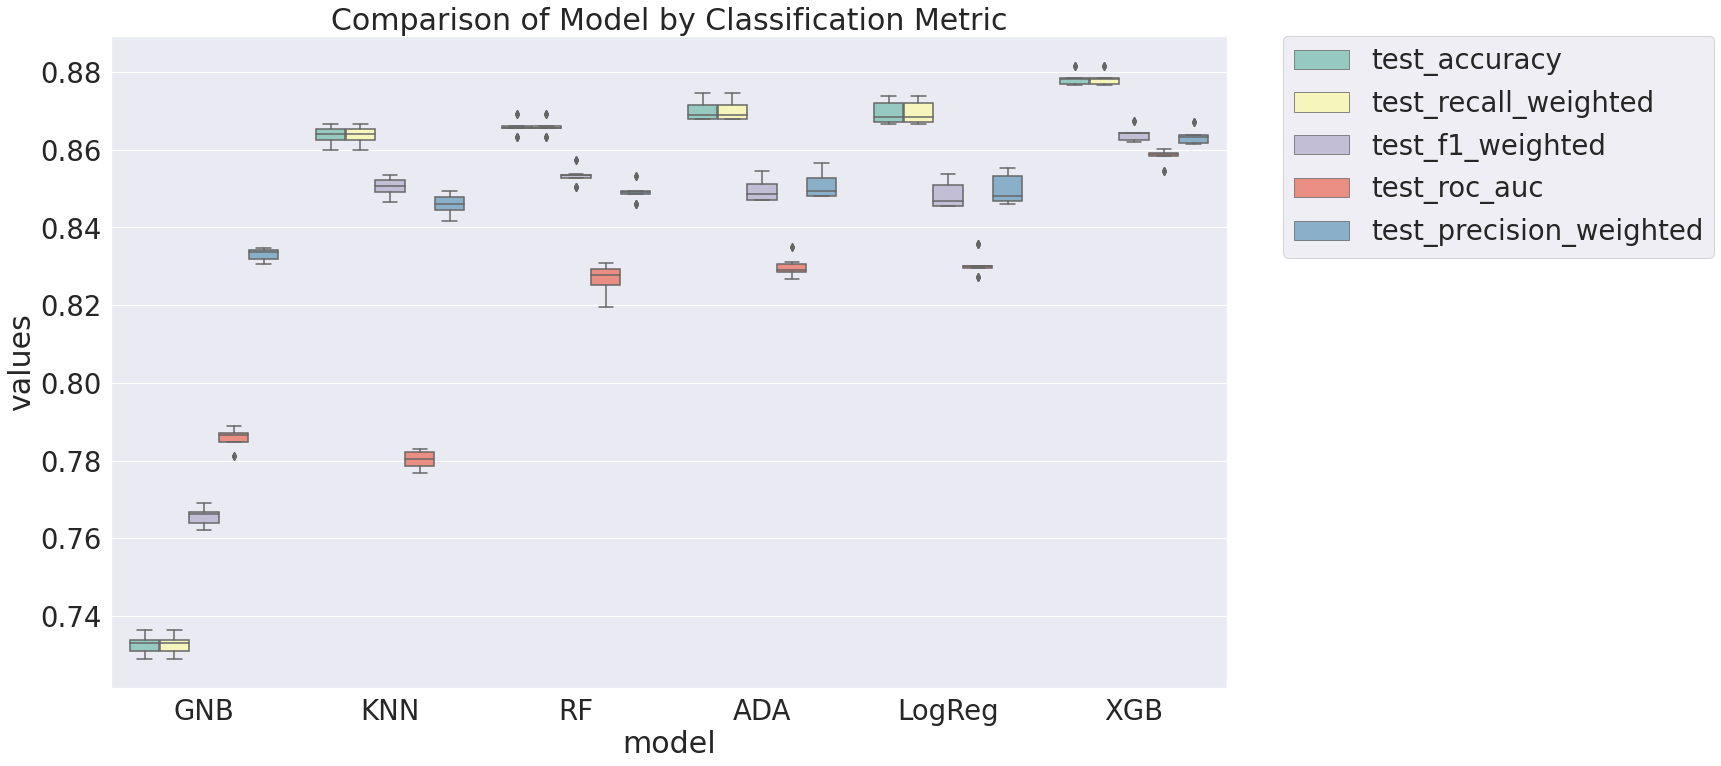

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [ ]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_precision_weighted           test_roc_auc           test_accuracy  \
                           std      mean          std      mean           std   
model                                                                           
ADA                   0.002913  0.850425     0.002328  0.829368      0.002225   
GNB                   0.001326  0.832967     0.002166  0.785651      0.002135   
KNN                   0.002695  0.845841     0.002183  0.780339      0.002329   
LogReg                0.003899  0.849945     0.002927  0.830861      0.002944   
RF                    0.002161  0.848902     0.004030  0.826055      0.001754   
XGB                   0.001874  0.863587     0.001825  0.858414      0.001622   

                 test_f1_weighted           test_recall_weighted            
            mean              std      mean                  std      mean  
model                                                                       
ADA     0.869769         0.002466  0.849312             0.002225  0.869769  
GNB     0.732389         0.001995  0.765364             0.002135  0.732389  
KNN     0.863726         0.002436  0.850332             0.002329  0.863726  
LogReg  0.869624         0.003436  0.848562             0.002944  0.869624  
RF      0.865688         0.002088  0.853127             0.001754  0.865688  
XGB     0.878492         0.001743  0.864124             0.001622  0.878492

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore') 

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                'n_estimators': [10,20,50,100,200],
                'subsample': [0.3, 0.5, 0.9],
                'colsample_bytree_vals' : [0.1, 0.5, 0.8, 1],
                'max_depth': [2, 5, 10]
                }


gbm = xgb.XGBClassifier(objective='binary:logistic')

#grid_class = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid, scoring='accuracy', cv=3, verbose=1)
grid_class = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid, scoring='recall', cv=3, verbose=1, n_iter=50, n_jobs=-1)

grid_class.fit(X_train, y_train)

print("Best parameters found: ",grid_class.best_params_)

print("Best accuracy found: ", grid_class.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[17:34:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:35:08] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:35:14] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but


[17:40:06] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:40:07] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:40:11] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some p

In [ ]:
# Split the data into training and test sets

xg_cl = xgb.XGBClassifier(objective='binary:logistic', 
                        n_estimators=100, 
                        seed=123,
                        learning_rate=0.1,
                        subsample=0.5,
                        colsample_bytree_vals=0.8,
                        max_depth=5)
                        
xg_cl.fit(X_train, y_train)

preds_xgb = xg_cl.predict(X_test)

[17:32:13] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




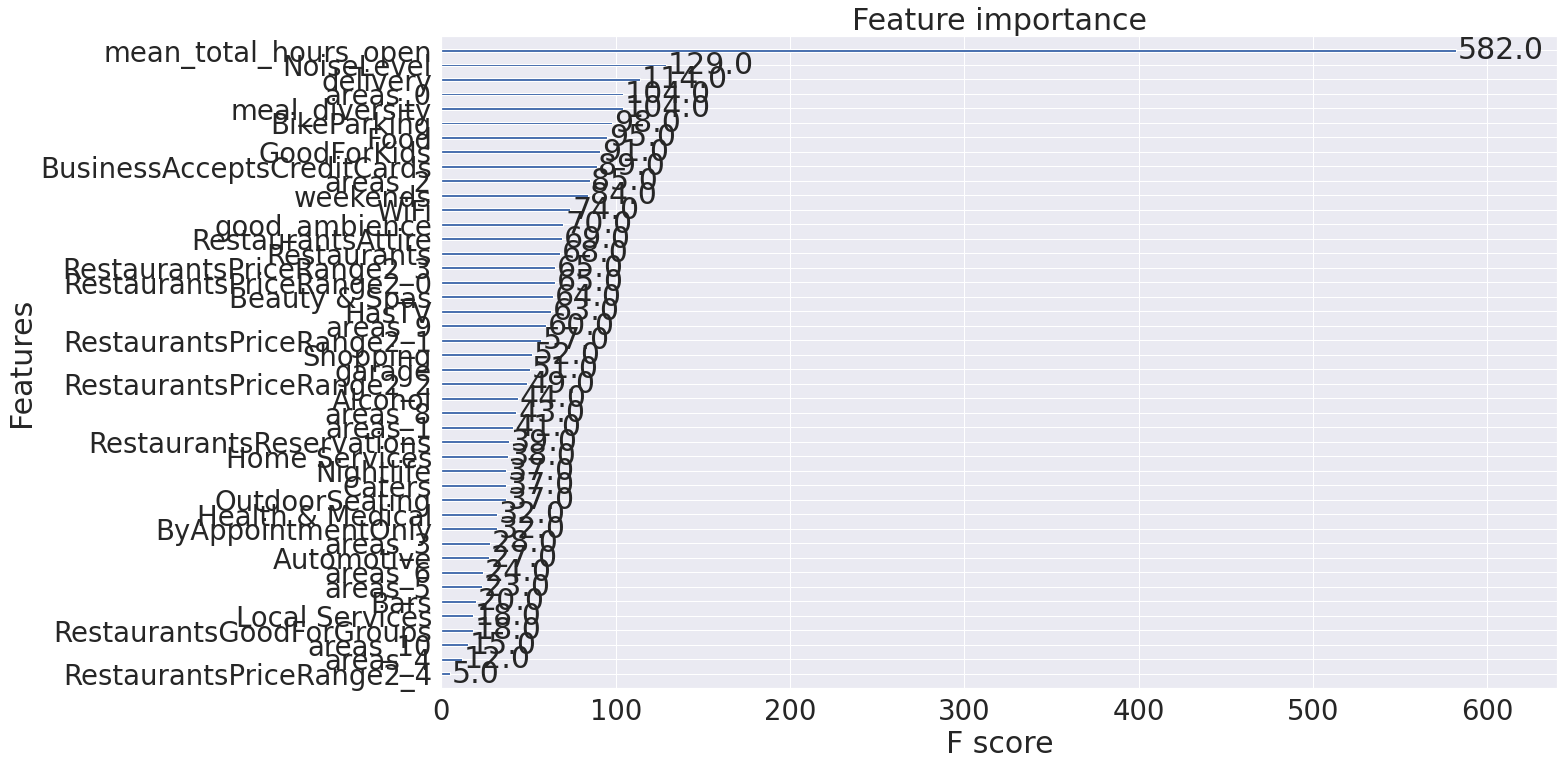

ValueError: min() arg is an empty sequence

In [ ]:
# Plot the feature importances
fig, ax = plt.subplots(figsize=(20, 12))
xgb.plot_importance(xg_cl, ax=ax)
plt.show()
#wandb.log({"plot": plt})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds_xgb)

In [ ]:
# OR to log a final metric at the end of training you can also use wandb.summary
wandb.summary["accuracy"] = accuracy
# Visualize single plot
wandb.sklearn.plot_confusion_matrix(y_test, preds_xgb)

In [ ]:
!add-apt-repository universe
!apt update
!apt install graphviz -y
!pip install graphviz

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
# Plot the last tree sideways
xgb.plot_tree(xg_cl,num_trees = 0, rankdir = 'LR', ax=ax)
plt.show()
wandb.log({"plot": plt})